In [1]:
import numpy as np
import fitsio as ft
import matplotlib as mpl
import matplotlib.pyplot as plt
from   matplotlib.gridspec import GridSpec
import pandas as pd
import seaborn as sns
import pymangle
import healpy as hp
import sys
sys.path.append('/Users/rezaie/github/SYSNet/src')
from utils import binit, binit_jac, moderr
from scipy.stats import pearsonr
from glob import glob
#import plotting
#import os
#os.environ['PROJ_LIB'] = '/Users/rezaie/anaconda3/envs/py3p6/share/proj'

In [14]:
def plot_2dclus(config , bias=None):   
    mpl.rcParams.update(mpl.rcParamsDefault)
    params = {
   #'axes.spines.right':False,
   #'axes.spines.top':False,
   'axes.labelsize': 16,
   #'text.fontsize': 8,
   'legend.fontsize': 14,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': True,
   #'figure.figsize': [4, 3],
   'font.family':'serif',
    'font.size':14
   }
    plt.rcParams.update(params)    
    cl = np.loadtxt(config['2dclustering']['cl_theory'], usecols=(1))
    c  = ['k', 'k', 'k', 'crimson', 'royalblue']    
    ls = ['-','-.','--', '-', '--']
    mk = ['^', 's', 'd', 'o', 'o']
    Nd = len(config['2dclustering']['flb'])
    print()
    fig, ax = plt.subplots(ncols=2,figsize=(12, 4))
    bias = 8.536537713893294e-07 #8.536537713893294e-07
    #
    # C_l
    #
    for i,l in enumerate(config['2dclustering']['flb']):
        d = np.load(config['2dclustering']['clpath'](l), allow_pickle=True).item()
        el = np.arange(d['auto'].size)
        #if l == 'nns':print(d['auto'][:5])
        if l in ['uni', 'nn_ab']:
            lb, clb = binit(el, d['auto'])
            lb, clbe = binit_jac(d['clerr']['cljks'])
            #lb, clbe = moderr(el, d['auto'], fsky=0.2278165022532145)
            print(clbe > clb)
            ax[0].errorbar(lb, clb, yerr=clbe,#-0.1*d['auto'][-1],
                  color=c[i], marker=mk[i], label=config['2dclustering']['lb'][i],
                          ls=ls[i]) #label=config['2dclustering']['lb'][i],
        else:
            lb, clb = binit(el, d['auto'])
            ax[0].plot(lb, clb,#-0.1*d['auto'][-1],
                  color=c[i], marker=mk[i], label=config['2dclustering']['lb'][i], ls=ls[i]) #label=config['2dclustering']['lb'][i],
    ax[0].plot(np.arange(1, cl.size+1), 2.**2*cl+bias, 'k:', label='Theory')    
    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].set_xlabel(r'$\ell$')
    ax[0].set_ylabel(r'C$_{\ell}$')
    ax[0].set_ylim(9.0e-7, 2.e-3)


    fc = 1.e2
    #tt, xit = np.loadtxt('/Users/rezaie/github/DESILSS/tests/lssdata/fftlog_xi.out', usecols=(0,1), unpack=True)
    #tt, xit = np.loadtxt('/Volumes/TimeMachine/data/mocks/wclfftloggz0.85redbias2lbsimp.dat', unpack=True)

    
#     for i,l in enumerate(config['2dclustering']['flb']):
#         d = np.load(config['2dclustering']['xipath'](l), allow_pickle=True).item()['auto']
#         #print(d['auto']['t'].keys())
#         #break
        
#         t  = 0.5*np.degrees(d['t'][1:]+d['t'][:-1])
#         xi = t*fc*(d['w']-d['dmean']*d['dmean'])
#         #print(np.any(xi <= 0.0))
#         #print(t)
#         if l in ['uni', 'nn_ab']:
#             xierr=t*d['werr']
#             ax[1].errorbar(t, xi, yerr=fc*xierr, label=config['2dclustering']['lb'][i], color=c[i], ls=ls[i])
#         else:
#             ax[1].plot(t, xi, label=config['2dclustering']['lb'][i], color=c[i], ls=ls[i])
    #ax[1].plot(tt, (2.**2)*tt*fc*xit, ':', color='k', label='Theory')
    
    ax[0].legend(bbox_to_anchor=(0, 1.02, 2, 0.4), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3, frameon=False)    
    ax[1].set_xlabel(r'$\theta [deg]$')
    ax[1].set_ylabel(r'$10^{2}\times \theta \times\omega(\theta)$')
    ax[1].set_xlim(-0.2, 10.1)
    ax[1].set_ylim(-0.5, 4.1)
    
    for i in range(2):
        ax[i].grid(True, ls=':', color='grey', alpha=0.5)
        
    ax[0].tick_params(direction='in', which='both', 
                        axis='both', right=True, top=True)
    ax[1].tick_params(direction='in', which='both', 
                        axis='both', pad=5)
            
    #ax[1].set_xscale('log')
    plt.savefig('./fig16-dr7clxi.pdf', bbox_inches='tight')
    plt.show()    

In [17]:
config = {'2dclustering':{'cl_theory':'/Volumes/TimeMachine/data/mocks/fftloggz0.85redbias2.out',
         'clpath':lambda l:'/Volumes/TimeMachine/data/DR7/results/clustering/cl_'+l+'.npy',
         'xipath':lambda l:'/Volumes/TimeMachine/data/DR7/results/clustering/xi_'+l+'.npy',
         'title':'DR7 DATA',
          #'lb':['with linear weights','with quadratic weights','no weights', 
          #        'with NN weights (spatial)','with NN weights', 'with NN weights w/ ablation'],
          #'flb':['lin', 'quad', 'uni', 'nns-10', 'nnr-10', 'nnrab-10'],
          'lb':['No Correction', 'Linear','Quadratic', 'Neural Network', 'Neural Network (plain)'],
          'flb':['uni','lin'], #, 'quad'], #'nn_ab', 'nn_p'],                          #,'linvl'
          'ouname':'./dr7_clustering.pdf'}}


[False False False False False False False False False]


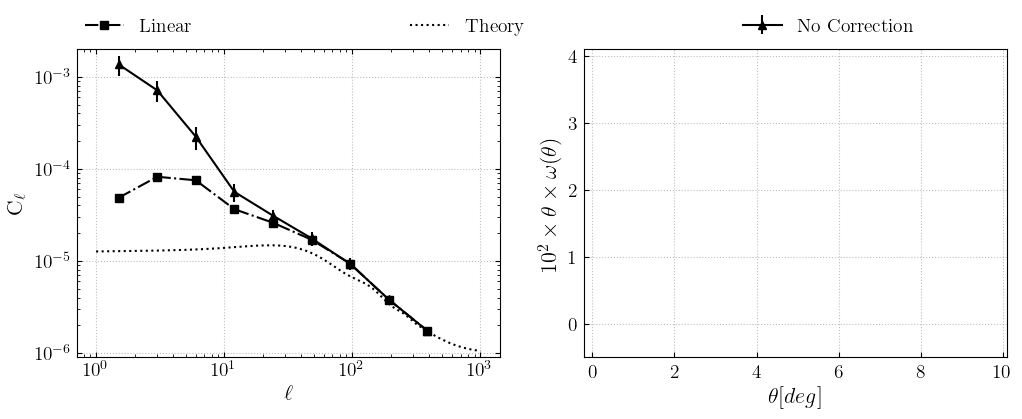

In [18]:
plot_2dclus(config, bias=8.536537713893294e-07) # from above

In [12]:
help(ut.histogram_cell)

Help on function histogram_cell in module lssutils.utils:

histogram_cell(cell, return_err=False, method='nmodes', bins=None, fsky=1.0, **kwargs)
    Function bins C_ell and estimates the error
    
    
    parameters
    ----------
    cell : array_like, or dict of array_like
    
    return_err : boolean
    
    method : str
        nmodes : error based on mode counting
        
        jackknife : error based on Jackknife sub-sampling
        
    bins : array_like
    
    fsky : float
        fraction of sky covered
        
    kwargs : dict
        optional arguments for `__histogram_cell`
        
        
        
    returns
    -------
    ell_bin : array_like
    
    cell_bin : array_like
    
    cell_bin_err : array_like 
        (optional)

